# **<font size=4 color=#BB3D00 face=微软雅黑>两个移动平均过程的互相关</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/cross-correlation-of-two-moving-average-processes.html     
描述：本案例
### - <font color=DarkOrChid size=3>示例：如何查找和绘制两个移动平均过程之间的互相关序列</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：如何查找和绘制两个移动平均过程之间的互相关序列</font>

该示例将样本互相关与理论互相关进行比较。使用两个不同的移动平均滤波器过滤N(0,1)个白噪声输入。绘制样本和理论互相关序列。
创建一个$N(0,1）$白噪声序列。将随机数生成器设置为可再现结果的默认设置。创建两个移动平均值过滤器。一个滤波器具有脉冲响应$δ(n)+δ(n−1)$. 另一个滤波器具有脉冲响应$δ(n)−δ(n−1)$.

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

初始化数据

In [5]:
rng = np.random.default_rng()

xn = np.random.randn(100,1)

x = signal.lfilter([1,1], 1, xn)
x = np.array(x).flatten()
y = signal.lfilter([1,-1], 1, xn)
y = np.array(y).flatten()

定义函数detrend_none

    返回x：不删除趋势

    参数
    ----------
    x : 任意对象

    axis : 整数

    另请参见
    --------
    detrend_mean : 其他detrend算法
    detrend_linear : 其他detrend算法
    detrend :所有detrend算法的包装
    

In [6]:
def detrend_none(x, axis=None):
    
    return x

定义函数M_xcorr

    绘制x和y之间的互相关


    参数
    ----------
    x, y : 长度为n的类数组

    maxlags : 整数, 默认值: 10
        要显示的滞后数。如果没有，将返回所有 ``2 * len(x) - 1``
        滞后

    Returns
    -------
    lags : 矩阵 (length ``2*maxlags+1``)
        滞后向量
    c : 矩阵  (length ``2*maxlags+1``)
        滞后向量
    

In [7]:
def M_xcorr( x, y, normed=True, detrend=detrend_none,
           maxlags=10, **kwargs):
    
    Nx = len(x)
    if Nx != len(y):
        raise ValueError('x and y must be equal length')

    x = detrend(np.asarray(x))
    y = detrend(np.asarray(y))

    correls = np.correlate(x, y, mode="full")

    if normed:
        correls /= np.sqrt(np.dot(x, x) * np.dot(y, y))

    if maxlags is None:
        maxlags = Nx - 1

    if maxlags >= Nx or maxlags < 1:
        raise ValueError('maxlags must be None or strictly '
                         'positive < %d' % Nx)

    lags = np.arange(-maxlags, maxlags + 1)
    correls = correls[Nx - 1 - maxlags:Nx + maxlags]


    return  correls, lags


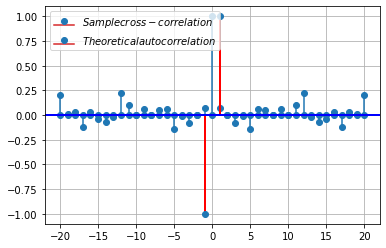

In [8]:
[xc,lags] = M_xcorr(x, y, maxlags=20)

Xc = np.zeros(np.size(xc))
Xc[19] = -1
Xc[21] = 1

plt.stem(lags,xc, label = '$Sample cross-correlation$')
markerline, stemlines, baseline = plt.stem(lags,Xc, linefmt = 'r-', label = '$Theoretical autocorrelation$')
plt.setp(stemlines, 'linewidth', 2)
plt.grid(True)
plt.legend(loc = "upper left")
plt.axhline(0, color='blue', lw=2)
plt.show()